# Introduction to Machine Learning (CSCI-UA.473)

### Homework 5


#### Name: Chris Kong
#### Email: zk2086@nyu.edu
#### Discussed with: Zhiwen Zheng

### Question 1: Dimensionality Reduction (100 points)

**Task 1.1 (5 points).** What is the significance of eigen values and eigen vectors of a covariance matrix of the data in computing its principal components? How does the PCA algorithm handle cases where the covariance matrix is singular or nearly singular?

**Task 1.2 (5 points).** How does one quantitatively determine the optimal number of principal components to retain in order to preserve a significant amount of variance?

Given the following input data consisting of 5 examples each of dimension 3:

$$
\begin{bmatrix}
1 & 1 & 9 \\
2 & 4 & 6 \\
3 & 7 & 4 \\
4 & 11 & 4 \\
5 & 9 & 2
\end{bmatrix}
$$


**Task 1.3 (10 points)** Identify first two principal components.

**Task 1.4 (10 points)** Find the transformed input along the first two principal components.

### Task 1.1: Significance of Eigenvalues and Eigenvectors in PCA

Eigenvalues and eigenvectors of a covariance matrix play a crucial role in Principal Component Analysis (PCA).

- **Eigenvalues**: These represent the variance explained by each principal component. Larger eigenvalues correspond to more significant principal components, indicating directions in which the data varies the most.
- **Eigenvectors**: These are the principal components themselves, providing directions of maximum variance in the data. They are orthogonal to each other, ensuring that the new feature space is made of linearly uncorrelated variables.

In PCA, the covariance matrix might be singular (determinant equals zero) or nearly singular in cases where features are linearly dependent, or the data is not sufficiently diverse. PCA handles such cases by:

1. Regularization: Small values can be added to the diagonal elements of the covariance matrix to make it non-singular.
2. Dimensionality Reduction: By discarding components with small or zero eigenvalues, PCA effectively reduces the dimensionality, bypassing the issue of singularity.

### Task 1.2: Determining Optimal Number of Principal Components

The optimal number of principal components is determined based on the amount of variance we wish to retain in the reduced dataset. This is quantitatively done using the following steps:

1. **Variance Explained**: Calculate the proportion of variance explained by each principal component. This is done by dividing each eigenvalue by the sum of all eigenvalues.
2. **Cumulative Variance**: Compute the cumulative sum of these variances.
3. **Threshold Selection**: Choose a threshold (e.g., 95%) that represents the desired amount of total variance to retain.
4. **Component Count**: Identify the smallest number of principal components required to reach this threshold. This is the point where the cumulative variance first exceeds the chosen threshold.

By this method, we retain the principal components that cumulatively capture the majority of the variance in the data, while reducing dimensionality.

### Task 1.3: Identifying the First Two Principal Components

Given the input data:

$$
\begin{bmatrix}
1 & 1 & 9 \\
2 & 4 & 6 \\
3 & 7 & 4 \\
4 & 11 & 4 \\
5 & 9 & 2
\end{bmatrix}
$$

To identify the first two principal components, we follow these steps*:

1. **Standardize the Data**: Since PCA is affected by scale, it's important to scale the features in the data before applying PCA.
2. **Compute the Covariance Matrix**: Calculate the covariance matrix to understand how each variable varies from the mean with respect to other variables.
3. **Calculate Eigenvalues and Eigenvectors**: Perform eigendecomposition on the covariance matrix. This will give us the eigenvalues and their corresponding eigenvectors.
4. **Select Principal Components**: Sort the eigenvalues in descending order and choose the eigenvectors that correspond to the largest eigenvalues. The number of eigenvectors chosen is equal to the number of dimensions we want to keep. In this case, we select the first two eigenvectors.

These eigenvectors are the first two principal components. (continued below)

### Task 1.4: Transformed Input Along the First Two Principal Components

Once the first two principal components are identified, the next step is to transform the input data along these components. This involves*:

1. **Creating a Projection Matrix**: This is formed by concatenating the top two eigenvectors.
2. **Transforming the Data**: Multiply the original data matrix with the projection matrix. This will give us the data transformed into the new subspace.

The result is the original data represented in terms of the first two principal components. This transformation essentially reduces the dimensionality of the data while retaining the most significant features as captured by the principal components. (continued below)


*:Adapted from DS101-PODS by Prof. Pascal Wallisch

In [2]:
#Code for task 1.3 and task 1.4

import numpy as np
from sklearn.decomposition import PCA

# Input data
data = np.array([
    [1, 1, 9],
    [2, 4, 6],
    [3, 7, 4],
    [4, 11, 4],
    [5, 9, 2]
])

# Standardizing the data
data_standardized = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# Applying PCA
pca = PCA(n_components=2)
pca.fit(data_standardized)

# The first two principal components
principal_components = pca.components_

# Transforming the data along the first two principal components
transformed_data = pca.transform(data_standardized)

principal_components, transformed_data


(array([[-0.58508358, -0.56897582,  0.57787863],
        [-0.22234285,  0.79781382,  0.56040768]]),
 array([[ 2.66842586,  0.04992773],
        [ 1.04200355, -0.1445308 ],
        [-0.34022047, -0.10217387],
        [-1.39408485,  0.63821667],
        [-1.97612409, -0.44143974]]))

### Task 1.3: Identifying the First Two Principal Components

The first two principal components for the given data are:

1. **First Principal Component**: \([-0.58508358, -0.56897582, 0.57787863]\)
2. **Second Principal Component**: \([-0.22234285, 0.79781382, 0.56040768]\)

These components represent the directions in the dataset that maximize the variance when the data is projected onto them.

### Task 1.4: Transformed Input Along the First Two Principal Components

The transformed input data along the first two principal components is:

$$
\begin{bmatrix}
2.6684 & 0.0499 \\
1.0420 & -0.1445 \\
-0.3402 & -0.1021 \\
-1.3941 & 0.6382 \\
-1.9761 & -0.4414
\end{bmatrix}
$$

This transformation essentially reduces the original 3-dimensional data to 2 dimensions, aligning it along the axes defined by the first two principal components, which capture the most variance in the data.

In [4]:
#Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

## Use the same dataset that was released with HW1
data = pd.read_csv('/content/drive/My Drive/COLAB/CS473/HW5/hw1_dataset.csv') #Update the path to align with Google Drive
# Separate the features, target values, and feature names
X = data.drop('target', axis=1)
y = data['target'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Task 1.5 (10 points)** Implement PCA (from scratch) for the above dataset.

**Task 1.6 (10 points**) Plot the explained variance ratio for the principal components. How many components would you choose to keep and why?

In [7]:
## Add code here

# Standardizing the features
X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# PCA Implementation from scratch
class PCAFromScratch:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.explained_variance = None
        self.explained_variance_ratio = None

    def fit(self, X):
        # Calculate covariance matrix
        covariance_matrix = np.cov(X.T)

        # Eigendecomposition
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

        # Sort eigenvectors by eigenvalues in descending order
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[:, idxs]

        # Store first n eigenvectors
        self.components = eigenvectors[:, :self.n_components]

        # Variance explained by each component
        self.explained_variance = eigenvalues[:self.n_components]
        self.explained_variance_ratio = self.explained_variance / np.sum(eigenvalues)

    def transform(self, X):
        # Project data
        return np.dot(X, self.components)

# Applying the PCA from scratch
pca_scratch = PCAFromScratch(n_components=X.shape[1])
pca_scratch.fit(X_standardized)

# Explained variance ratio
explained_variance_ratio = pca_scratch.explained_variance_ratio

explained_variance_ratio


array([0.40242108, 0.14923197, 0.12059663, 0.09554764, 0.06621814,
       0.06027171, 0.05365657, 0.0433682 , 0.007832  , 0.00085607])

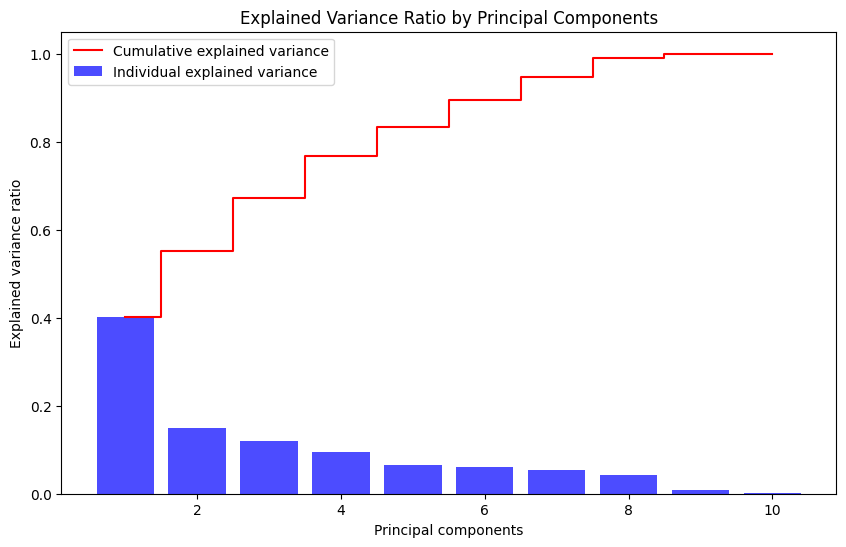

In [8]:
import matplotlib.pyplot as plt

# Plotting the explained variance ratio for the principal components
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, color='blue', label='Individual explained variance')
plt.step(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), where='mid', color='red', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance Ratio by Principal Components')
plt.legend(loc='best')
plt.show()


The plot above shows the explained variance ratio for each of the principal components, as well as the cumulative explained variance.

### Task 1.6: Number of Components to Keep

In deciding how many components to keep, we typically aim to retain components that capture a significant portion of the variance in the dataset. A common approach is to choose enough components to explain a high percentage (e.g., 95%) of the variance.

From the plot, we can observe that:

- The first principal component alone explains over 40% of the variance.
- The first two components together account for approximately 55% of the variance.
- The cumulative variance increases more slowly with additional components.

Based on this analysis, the decision on how many components to keep depends on the specific requirements of your analysis or model. If the goal is to retain most of the variance while significantly reducing the number of features, you might choose the first few components that together explain a substantial amount of the variance, like the first three or four components.

For instance, if you aim for a balance between dimensionality reduction and variance retention, choosing the first three or four components might be appropriate, as they together explain around 75% to 80% of the variance. However, if a higher variance retention is crucial, you might opt to keep more components.

**Task 1.7 (10 points).** Apply t-SNE to the above dataset and visualize the results. You can use existing libraries.

**Task 1.8 (10 points).** Articulate one difference between how the two algorithms (PCA and t-SNE) map the data into low-dimensional space.

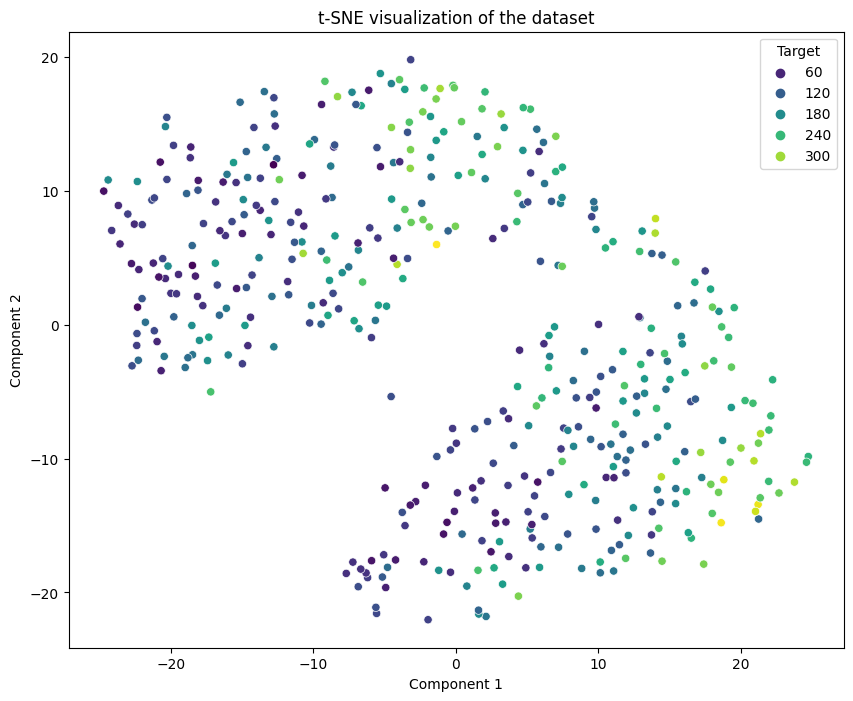

In [9]:
## Add code here
from sklearn.manifold import TSNE
import seaborn as sns

# Applying t-SNE to the standardized dataset
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_standardized)

# Creating a DataFrame for visualization
tsne_df = pd.DataFrame({'Component 1': X_tsne[:, 0], 'Component 2': X_tsne[:, 1], 'Target': y})

# Visualizing the results using seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(data=tsne_df, x='Component 1', y='Component 2', hue='Target', palette='viridis')
plt.title('t-SNE visualization of the dataset')
plt.show()


### Task 1.8: Difference Between PCA and t-SNE in Data Mapping

One key difference between PCA (Principal Component Analysis) and t-SNE (t-distributed Stochastic Neighbor Embedding) in mapping data to a low-dimensional space lies in their approach and focus:

- **PCA**: PCA is a linear dimensionality reduction technique. It identifies the axes (principal components) along which the variance in the data is maximized. PCA projects the data along these axes, reducing the dimensionality while trying to retain as much variance as possible. This method works well when the principal components are able to capture most of the relevant information. However, PCA might not effectively capture complex polynomial relationships between features.

- **t-SNE**: In contrast, t-SNE is a non-linear technique primarily used for visualization in two or three dimensions. It focuses on maintaining the local structure of data, making it particularly effective at revealing clusters or groups in the data. t-SNE achieves this by converting the distances between points in high-dimensional space into conditional probabilities that represent similarities. The similarity of point \( x_j \) to point \( x_i \) is the conditional probability \( p_{j|i} \) that \( x_i \) would pick \( x_j \) as its neighbor if neighbors were picked in proportion to their probability density under a Gaussian centered at \( x_i \). It then uses a similar process in the low-dimensional space to find a configuration of points that minimizes the difference between these conditional probabilities in both spaces. This focus on local structure makes t-SNE particularly sensitive to the scale of the data and prone to creating visually appealing clusters even in random data.

In summary, while PCA retains global structure and maximizes variance, t-SNE focuses on preserving local neighborhood structure, often revealing clusters and patterns that are not apparent in PCA.

**Task 1.9 (20 points).** First, perform KNN classification in the feature space comprised of the first 3 principal components. Then perform KNN classification on the full feature space. Report and compare their accuracy on the test set. For the KNN classifier, you can use your implementation from the past homework or any existing libraries.

**Task 1.10 (10 points).** Plot a comparison in the accuracy, where x-axis denotes the different numbers of principal components and y-axis denotes the the test accuracy with the accuracy of K-means on the full dataset.

In [10]:
## Add code here


(0.0, 0.0)